Table of content
1. New-vendor Problem
    - problem description
    - case 1: the original probelm
    - case 2: maximizing the wrost case
    - case 3: more than 80% the profit is more than 4000 (chance contraints)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(a=600)

### New-vendor Problem
#### original problem:
$
max_x \ E[f(x)]\\
\\
\ st:\\
\ f(x)=c_s \hat{s}+ c_d \hat{s}' - c_p x\\
\ 0\le \hat{s}\le \min\{x,\hat{d}\}\\
\ 0\le \hat{s}'\le \max\{0,x-\hat{d}\}
$

where $f(x)$ is the profit of purchasing x units; $c_s$ is the unit selling price; $c_d$ is the unit discounted selling price; $c_p$ is the unit purchasing cost; $\hat{s}$ is sales; $\hat{s}'$ is discounted sales;

#### issue:

$E[f(x)]=\int_{0}^{\infty}xf(x)dx \ $    => hard to solve 


#### relaxation:
Assume the uncertainty set $U$ has a finite number of elements. And the problem can be reformulated into a big LP problem:

$
max_x \ \sum_{u\in{U}} p_u \ [ c_s s_u+ c_d s'_u - c_p x]\\
\\
\ st:\\
\ 0\le s_u\le \min\{x,d_u\} \ ,\forall u\in{U}\\
\ 0\le s'_u\le \max\{0,x-d_u\} \ ,\forall u\in{U}
$

reformulate the problem:

$
max_x \ \sum_{u\in{U}} p_u \ [ c_s s_u+ c_d s'_u - c_p x]\\
\\
\ st:\\
\ s_u+s'_u=x\ ,\forall u\in{U}\\ 
\ 0\le s_u\le \alpha_u\ ,\forall u\in{U}\\
\ \alpha_u\le x\ ,\forall u\in{U}\\
\ \alpha_u\le d_u\ ,\forall u\in{U}\\
\ 0\le s'_u\le \beta_u \ ,\forall u\in{U}\\
\ \beta_u\ge 0\ ,\forall u\in{U}\\
\ \beta_u\ge x-d_u\ ,\forall u\in{U}
$

# Demands
#### generating random demands from a normal distribution

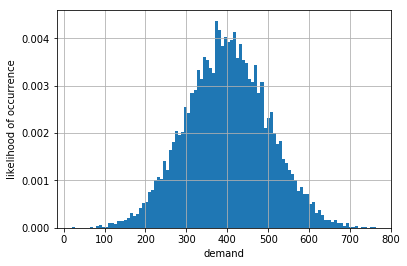

In [2]:
sigma   = 100
mu      = 400
samples = 10000
demand  = [max(random.normalvariate(mu,sigma),0) for i in range(samples)]

Cs=15
Cd=-3
Cp=2

plt.hist(demand,bins=100,density=True)
plt.grid(True)
plt.ylabel("likelihood of occurrence")
plt.xlabel("demand")
plt.show()

# what if x= $\mu$

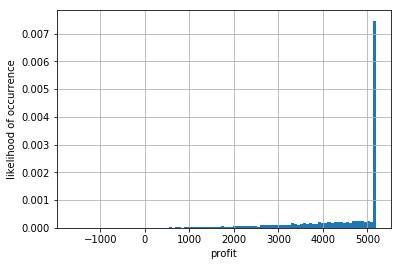

order quantity:400.00|mean profit:4472.32|std:1053.03 | worst case:-1641.30
25.77 % of cases profit is less than 4000


In [3]:
x=mu
profit=[Cs*min(x,demand[u])+Cd*max(0,x-demand[u])-Cp*x for u in range(samples)]
plt.hist(profit,bins=100,density=True)
plt.grid(True)
plt.ylabel("likelihood of occurrence")
plt.xlabel("profit")
plt.show()
print("order quantity:{0:.2f}|mean profit:{1:.2f}|std:{2:.2f} | worst case:{3:.2f}".format(x,np.mean(profit),np.std(profit),min(profit)))
profit_array=np.array(profit)
print(100*len(profit_array[profit_array<=4000])/len(profit_array),"% of cases profit is less than 4000" )

# what if x=$\mu+\sigma$

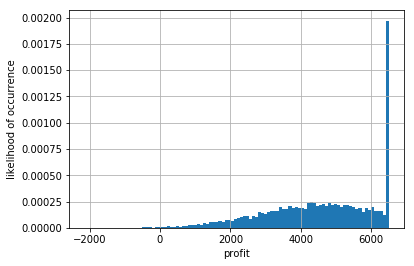

order quantity:500.00|mean profit:4535.67|std:1562.59 | worst case:-2141.30
35.25 % of cases profit is less than 4000


In [4]:
x=mu+sigma
profit=[Cs*min(x,demand[u])+Cd*max(0,x-demand[u])-Cp*x for u in range(samples)]
plt.hist(profit,bins=100,density=True)
plt.grid(True)
plt.ylabel("likelihood of occurrence")
plt.xlabel("profit")
plt.show()
print("order quantity:{0:.2f}|mean profit:{1:.2f}|std:{2:.2f} | worst case:{3:.2f}".format(x,np.mean(profit),np.std(profit),min(profit)))
profit_array=np.array(profit)
print(100*len(profit_array[profit_array<=4000])/len(profit_array),"% of cases profit is less than 4000" )

# what if x=$\mu+2\sigma$

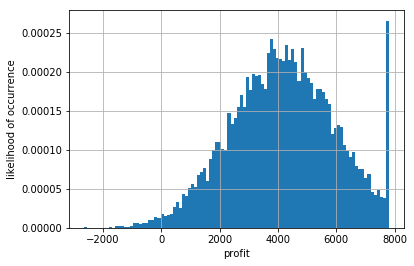

order quantity:600.00|mean profit:4172.72|std:1771.04 | worst case:-2641.30
46.0 % of cases profit is less than 4000


In [5]:
x=mu+2*sigma
profit=[Cs*min(x,demand[u])+Cd*max(0,x-demand[u])-Cp*x for u in range(samples)]
plt.hist(profit,bins=100,density=True)
plt.grid(True)
plt.ylabel("likelihood of occurrence")
plt.xlabel("profit")
plt.show()
print("order quantity:{0:.2f}|mean profit:{1:.2f}|std:{2:.2f} | worst case:{3:.2f}".format(x,np.mean(profit),np.std(profit),min(profit)))
profit_array=np.array(profit)
print(100*len(profit_array[profit_array<=4000])/len(profit_array),"% of cases profit is less than 4000" )

# what if x=$\mu+3\sigma$

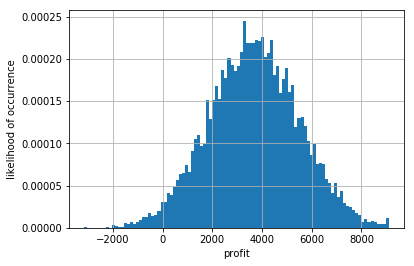

order quantity:700.00|mean profit:3687.02|std:1804.15 | worst case:-3141.30
57.09 % of cases profit is less than 4000


In [6]:
x=mu+3*sigma
profit=[Cs*min(x,demand[u])+Cd*max(0,x-demand[u])-Cp*x for u in range(samples)]
plt.hist(profit,bins=100,density=True)
plt.grid(True)
plt.ylabel("likelihood of occurrence")
plt.xlabel("profit")
plt.show()
print("order quantity:{0:.2f}|mean profit:{1:.2f}|std:{2:.2f} | worst case:{3:.2f}".format(x,np.mean(profit),np.std(profit),min(profit)))
profit_array=np.array(profit)
print(100*len(profit_array[profit_array<=4000])/len(profit_array),"% of cases profit is less than 4000" )

# Case I: the original problem

$
max_x \ \sum_{u\in{U}} p_u \ [ c_s s_u+ c_d s'_u - c_p x]\\
\\
\ st:\\
\ s_u+s'_u=x\ ,\forall u\in{U}\\ 
\ 0\le s_u\le \alpha_u\ ,\forall u\in{U}\\
\ \alpha_u\le x\ ,\forall u\in{U}\\
\ \alpha_u\le d_u\ ,\forall u\in{U}\\
\ 0\le s'_u\le \beta_u \ ,\forall u\in{U}\\
\ \beta_u\ge 0\ ,\forall u\in{U}\\
\ \beta_u\ge x-d_u\ ,\forall u\in{U}
$

In [7]:
from docplex.mp.model import Model

In [8]:
md1 = Model(name='news-vendor case 1')
x = md1.continuous_var(name="x",lb=0)
s = {(u):md1.continuous_var(name="s_{0}".format(u),lb=0) for u in range(samples)}
sp = {(u):md1.continuous_var(name="sp_{0}".format(u),lb=0) for u in range(samples)}
alpha = {(u):md1.continuous_var(name="alpha_{0}".format(u),lb=0) for u in range(samples)}
beta = {(u):md1.continuous_var(name="beta_{0}".format(u),lb=0) for u in range(samples)}

profit=(1.0/samples)*md1.sum(Cs*s[u]+Cd*sp[u]-Cp*x for u in range(samples))
md1.maximize(profit)

for u in range(samples):
    md1.add_constraint(s[u]+sp[u]==x)
    md1.add_constraint(s[u]<=alpha[u])
    md1.add_constraint(alpha[u]<=x)
    md1.add_constraint(alpha[u]<=demand[u])
    md1.add_constraint(sp[u]<=beta[u])
    md1.add_constraint(beta[u]>=x-demand[u])    

md1.print_information()

Model: news-vendor case 1
 - number of variables: 40001
   - binary=0, integer=0, continuous=40001
 - number of constraints: 60000
   - linear=60000
 - parameters: defaults


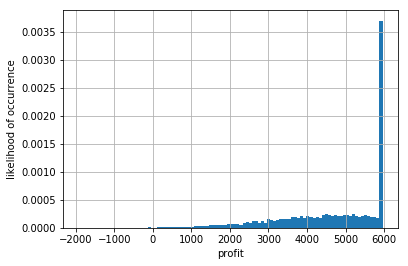

order quantity:458.49|mean profit:4582.56|std:1384.24 | worst case:-1933.75
31.25 % of cases profit is less than 4000


In [9]:
md1.solve()
x=md1.solution.as_dict()['x']
profit=[Cs*min(x,demand[u])+Cd*max(0,x-demand[u])-Cp*x for u in range(samples)]
plt.hist(profit,bins=100,density=True)
plt.grid(True)
plt.ylabel("likelihood of occurrence")
plt.xlabel("profit")
plt.show()
print("order quantity:{0:.2f}|mean profit:{1:.2f}|std:{2:.2f} | worst case:{3:.2f}".format(x,np.mean(profit),np.std(profit),min(profit)))
profit_array=np.array(profit)
print(100*len(profit_array[profit_array<=4000])/len(profit_array),"% of cases profit is less than 4000" )

#### solution from the optimization model has a high mean and lower std.

# Case II: maximize the worst case

$
max_x \ w\\
\\
\ st:\\
\ w \le  c_s s_u+ c_d s'_u - c_p x\ ,\forall u\in{U}\\ 
\ s_u+s'_u=x\ ,\forall u\in{U}\\ 
\ 0\le s_u\le \alpha_u\ ,\forall u\in{U}\\
\ \alpha_u\le x\ ,\forall u\in{U}\\
\ \alpha_u\le d_u\ ,\forall u\in{U}\\
\ 0\le s'_u\le \beta_u \ ,\forall u\in{U}\\
\ \beta_u\ge 0\ ,\forall u\in{U}\\
\ \beta_u\ge x-d_u\ ,\forall u\in{U}
$

In [10]:
md2 = Model(name='news-vendor case 2')
w = md2.continuous_var(name="w",lb=-md2.infinity)
x = md2.continuous_var(name="x",lb=0)
s = {(u):md2.continuous_var(name="s_{0}".format(u),lb=0) for u in range(samples)}
sp = {(u):md2.continuous_var(name="sp_{0}".format(u),lb=0) for u in range(samples)}
alpha = {(u):md2.continuous_var(name="alpha_{0}".format(u),lb=0) for u in range(samples)}
beta = {(u):md2.continuous_var(name="beta_{0}".format(u),lb=0) for u in range(samples)}

md2.maximize(w)

for u in range(samples):
    md2.add_constraint(w<=Cs*s[u]+Cd*sp[u]-Cp*x)
    md2.add_constraint(s[u]+sp[u]==x)
    md2.add_constraint(s[u]<=alpha[u])
    md2.add_constraint(alpha[u]<=x)
    md2.add_constraint(alpha[u]<=demand[u])
    md2.add_constraint(sp[u]<=beta[u])
    md2.add_constraint(beta[u]>=x-demand[u])    

md2.print_information()

Model: news-vendor case 2
 - number of variables: 40002
   - binary=0, integer=0, continuous=40002
 - number of constraints: 70000
   - linear=70000
 - parameters: defaults


* model news-vendor case 2 solved with objective = 259.063


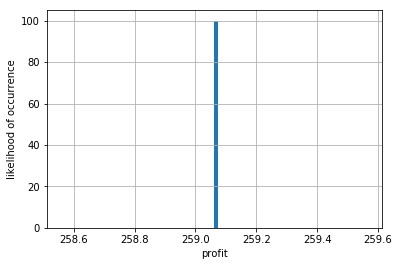

order quantity:19.93|mean profit:259.06|std:0.00 | worst case:259.06
100.0 % of cases profit is less than 4000


In [11]:
md2.solve()
md2.report()
x=md2.solution.as_dict()['x']
profit=[Cs*min(x,demand[u])+Cd*max(0,x-demand[u])-Cp*x for u in range(samples)]
plt.hist(profit,bins=100,density=True)
plt.grid(True)
plt.ylabel("likelihood of occurrence")
plt.xlabel("profit")
plt.show()
print("order quantity:{0:.2f}|mean profit:{1:.2f}|std:{2:.2f} | worst case:{3:.2f}".format(x,np.mean(profit),np.std(profit),min(profit)))
profit_array=np.array(profit)
print(100*len(profit_array[profit_array<=4000])/len(profit_array),"% of cases profit is less than 4000" )

# Case III: chance constraints
### 80% of time has a profit more than 4000

$
max_x \ \sum_{u\in{U}} p_u \ [ c_s s_u+ c_d s'_u - c_p x]\\
\\
\ st:\\
\ \sum_{u\in U}\theta_u \ge 0.80*|U| \ ,\forall u\in{U}\\ 
\ c_s s_u+ c_d s'_u - c_p x \ge 4000*\theta_u - M*(1-\theta_u) \ ,\forall u\in{U}\\ 
\ s_u+s'_u=x\ ,\forall u\in{U}\\ 
\ 0\le s_u\le \alpha_u\ ,\forall u\in{U}\\
\ \alpha_u\le x\ ,\forall u\in{U}\\
\ \alpha_u\le d_u\ ,\forall u\in{U}\\
\ 0\le s'_u\le \beta_u \ ,\forall u\in{U}\\
\ \beta_u\ge 0\ ,\forall u\in{U}\\
\ \beta_u\ge x-d_u\ ,\forall u\in{U}
$

In [12]:
md3 = Model(name='news-vendor chance constraint')
x = md3.continuous_var(name="x",lb=0)
s = {(u):md3.continuous_var(name="s_{0}".format(u),lb=0) for u in range(samples)}
sp = {(u):md3.continuous_var(name="sp_{0}".format(u),lb=0) for u in range(samples)}
alpha = {(u):md3.continuous_var(name="alpha_{0}".format(u),lb=0) for u in range(samples)}
beta = {(u):md3.continuous_var(name="beta_{0}".format(u),lb=0) for u in range(samples)}

theta= {(u):md3.binary_var(name="theta_{0}".format(u)) for u in range(samples)}

profit=(1.0/samples)*md3.sum(Cs*s[u]+Cd*sp[u]-Cp*x for u in range(samples))
md3.maximize(profit)


md3.add_constraint(md3.sum(theta[u] for u in range(samples))>=0.80*samples)

for u in range(samples):
    md3.add_constraint(Cs*s[u]+Cd*sp[u]-Cp*x>=4000*theta[u]-(9999)*(1-theta[u]))
    md3.add_constraint(s[u]+sp[u]==x)
    md3.add_constraint(s[u]<=alpha[u])
    md3.add_constraint(alpha[u]<=x)
    md3.add_constraint(alpha[u]<=demand[u])
    md3.add_constraint(sp[u]<=beta[u])
    md3.add_constraint(beta[u]>=x-demand[u])    

md3.print_information()

Model: news-vendor chance constraint
 - number of variables: 50001
   - binary=10000, integer=0, continuous=40001
 - number of constraints: 70001
   - linear=70001
 - parameters: defaults


In [13]:
md3.solve()
md3.report()

* model news-vendor chance constraint solved with objective = 4058.269


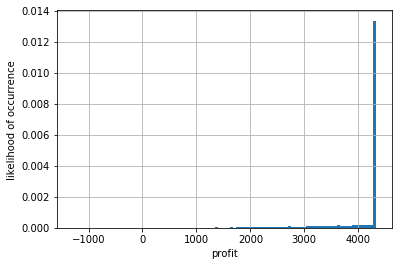

order quantity:333.51|mean profit:4058.27|std:646.31 | worst case:-1308.84
20.01 % of cases profit is less than 4000


In [14]:
x=md3.solution.as_dict()['x']
profit=[Cs*min(x,demand[u])+Cd*max(0,x-demand[u])-Cp*x for u in range(samples)]
plt.hist(profit,bins=100,density=True)
plt.grid(True)
plt.ylabel("likelihood of occurrence")
plt.xlabel("profit")
plt.show()
print("order quantity:{0:.2f}|mean profit:{1:.2f}|std:{2:.2f} | worst case:{3:.2f}".format(x,np.mean(profit),np.std(profit),min(profit)))
profit_array=np.array(profit)
print(100*len(profit_array[profit_array<=4000])/len(profit_array),"% of cases profit is less than 4000" )